Exploring different similarity measures and feature extraction methods in document retrieval

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.neighbors import NearestNeighbors


In [ ]:
#articles dataset
articles = pd.read_csv('../input/people_wiki.csv')

In [88]:
articles.head(10)

,URI,name,text,word_count,word_weightage_tfidf,length
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...,"{'melbourne': 1, 'college': 1, 'parade': 1, 'e...","{'digby': 0.09377484096114971, 'morrell': 0.51...",251
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...,"{'every': 1, 'capsule': 1, 'take': 1, 'they': ...","{'is': 0.018289389212318905, 'with': 0.0214013...",223
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...,"{'society': 1, 'hamilton': 1, 'membership': 1,...","{'is': 0.08336282198056562, 'who': 0.022133364...",226
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...,"{'kurdlawitzpreis': 1, 'special': 1, 'this': 1...","{'born': 0.010026069084461827, 'is': 0.0243723...",377
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...,"{'curtis': 1, 'promo': 1, 'europe': 1, 'cent':...","{'born': 0.010591379685247771, 'is': 0.0085821...",201
5,<http://dbpedia.org/resource/Sam_Henderson>,Sam Henderson,sam henderson born october 18 1969 is an ameri...,"{'niblit': 1, 'weekly': 1, 'march': 1, 'yorksi...","{'born': 0.023501708237170117, 'october': 0.02...",270
6,<http://dbpedia.org/resource/Aaron_LaCrate>,Aaron LaCrate,aaron lacrate is an american music producer re...,"{'verb': 1, 'streamz': 1, 'mz': 1, 'artists': ...","{'born': 0.006002651605774405, '10': 0.0156933...",440
7,<http://dbpedia.org/resource/Trevor_Ferguson>,Trevor Ferguson,trevor ferguson aka john farrow born 11 novemb...,"{'concordia': 1, 'creative': 1, 'frequently': ...","{'born': 0.00820721333177173, 'is': 0.03325154...",633
8,<http://dbpedia.org/resource/Grant_Nelson>,Grant Nelson,grant nelson born 27 april 1971 in london also...,"{'agnes': 1, 'knuckles': 1, 'frankie': 1, 'sim...","{'born': 0.012399627431245069, 'is': 0.0200948...",248
9,<http://dbpedia.org/resource/Cathy_Caruth>,Cathy Caruth,cathy caruth born 1955 is frank h t rhodes pro...,"{'n3': 1, '173182': 1, 'pp': 1, 'harvard': 1, ...","{'born': 0.01310532910631305, 'is': 0.04247701...",210


Lets look at 10 Nearest neighbors of Barack Obama's page using word count vectors of the articles and using Euclidean Metric as similairty

In [ ]:
#Tfidf features and word count vectors
vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()
features_word_count = vectorizer.fit_transform(articles['text'])
features_tfidf = tfidf_vectorizer.fit_transform(articles['text'])


In [ ]:
model_word_cnt = NearestNeighbors(metric='minkowski', p = 2)
model_word_cnt.fit(features_word_count)
dist,indices = model_word_cnt.kneighbors(n_neighbors = 10)

In [ ]:
articles[articles['name']=='Barack Obama'] #35817th row

In [89]:
#Printing 10 NNs of Barack Obama
for i in range(10):
    print(str(articles.loc[indices[35817][i],'name']) + "-------" + str(dist[35817][i]))
    
    

Joe Biden-------33.015148038438355
George W. Bush-------34.307433596816885
Mitt Romney-------35.79106033634656
Lawrence Summers-------36.069377593742864
Walter Mondale-------36.24913792078372
Francisco Barrio-------36.27671429443411
Don Bonker-------36.40054944640259
Wynn Normington Hugh-Jones-------36.4417343165772
Refael (Rafi) Benvenisti-------36.837480912787726
Andy Anstett-------36.945906403822335


Lets look at the word count representation of Barack Obama and each of its Nearest Neighbors

In [ ]:
vocab = vectorizer.vocabulary_
def unpack_dict(matrix, map_index_to_word):
    
    
    table = sorted(map_index_to_word, key=map_index_to_word.get)
        
    data = matrix.data
    indices = matrix.indices
    indptr = matrix.indptr
    
    num_doc = matrix.shape[0]

    return [{k:v for k,v in zip([table[word_id] for word_id in indices[indptr[i]:indptr[i+1]] ],
                                 data[indptr[i]:indptr[i+1]].tolist())} \
               for i in range(num_doc) ]

articles['word_count'] = unpack_dict(features_word_count,vocab )

In [90]:
print("Obama's article:" + "\n" )
print(sorted(articles.loc[35817,'word_count'].items(), key = lambda x:x[1], reverse = True))
print("-------------------------------------------------------------------------" + "\n")
print('Artticles of 10 NNs of Obama' + '\n')
for ind in indices[35817]:
    dictn = articles.loc[ind,'word_count']
    print(sorted(dictn.items(), key = lambda x:x[1],reverse = True))
    print('\n')

Obama's article:

[('the', 40), ('in', 30), ('and', 21), ('of', 18), ('to', 14), ('his', 11), ('obama', 9), ('act', 8), ('he', 7), ('law', 6), ('us', 6), ('as', 6), ('was', 5), ('control', 4), ('iraq', 4), ('military', 4), ('democratic', 4), ('president', 4), ('after', 4), ('has', 4), ('for', 4), ('involvement', 3), ('ordered', 3), ('response', 3), ('senate', 3), ('term', 3), ('signed', 3), ('campaign', 3), ('election', 3), ('party', 3), ('school', 3), ('2004', 3), ('american', 3), ('january', 3), ('states', 3), ('united', 3), ('2011', 3), ('2009', 3), ('from', 3), ('first', 3), ('with', 3), ('nominee', 2), ('presidential', 2), ('representatives', 2), ('primary', 2), ('illinois', 2), ('afghanistan', 2), ('republican', 2), ('relief', 2), ('dont', 2), ('office', 2), ('protection', 2), ('domestic', 2), ('policy', 2), ('20', 2), ('foreign', 2), ('harvard', 2), ('november', 2), ('house', 2), ('second', 2), ('served', 2), ('2010', 2), ('on', 2), ('national', 2), ('chicago', 2), ('university'

As you can see the most frequently used words like 'the', 'of' , 'as' are in the 10 NNs of Barack Obama's Article. Now lets do the same using TF IDF representation of documents

In [ ]:
model_tfidf = NearestNeighbors(metric = 'euclidean')
model_tfidf.fit(features_tfidf)
dist_tfidf,indices_tfidf = model_tfidf.kneighbors(n_neighbors = 10)

In [91]:
#Printing 10 NNs of Barack Obama with the learnt NNs using TFIDF representation
for i in range(10):
    print(str(articles.loc[indices_tfidf[35817][i],'name']) + "-------" + str(dist_tfidf[35817][i]))

Joe Biden-------1.0684387489755511
Hillary Rodham Clinton-------1.1098955951464644
Samantha Power-------1.1180281484430081
Eric Stern (politician)-------1.1399693756759248
George W. Bush-------1.1477693200355306
John McCain-------1.1503743970400013
Artur Davis-------1.1549392449624127
Henry Waxman-------1.1577605235802377
Jeff Sessions-------1.159678326779099
Barry Sullivan (lawyer)-------1.161629038844196


Lets look how tfidf featuring weights different words in NNs of Obama

In [93]:
articles['word_weightage_tfidf'] = unpack_dict(features_tfidf,vocab)
print("Obama's article:" + "\n" )
print(sorted(articles.loc[35817,'word_weightage_tfidf'].items(), key = lambda x:x[1], reverse = True))
print("-------------------------------------------------------------------------" + "\n")
print('Artticles of 10 NNs of Obama' + '\n')
for ind in indices[35817]:
    dictn = articles.loc[ind,'word_weightage_tfidf']
    print(sorted(dictn.items(), key = lambda x:x[1],reverse = True))
    print('\n')

Obama's article:

[('obama', 0.3650175898187781), ('the', 0.2793227400023615), ('act', 0.2490890416206761), ('in', 0.20967299876631698), ('iraq', 0.15180855532927304), ('and', 0.14673880270062417), ('law', 0.14468744228550123), ('control', 0.1318571790693225), ('of', 0.1262048162788276), ('us', 0.12283397315748205), ('ordered', 0.12237967144422175), ('military', 0.11949751478498162), ('democratic', 0.11457527543739672), ('response', 0.11018747157297994), ('involvement', 0.11018747157297994), ('to', 0.10234195997379708), ('his', 0.09697568415459205), ('senate', 0.09190764690847711), ('term', 0.08601050224836597), ('campaign', 0.08432957751302084), ('nominee', 0.07978930883791377), ('afghanistan', 0.07971048613465608), ('husen', 0.07885433263257774), ('laureateduring', 0.07885433263257774), ('2012obama', 0.07885433263257774), ('president', 0.07838762808221296), ('domestic', 0.07655771702893438), ('normalize', 0.0760232295807462), ('brk', 0.0760232295807462), ('relief', 0.0756865384502070

We see that it penalizes frequently occuring words as it was in the case of NNs which were found learning from word counts.
If we see length of articles of NNs of Obama  in this case.

In [94]:
print('Length of articles')
for i in range(10):
    print(str(articles.loc[indices_tfidf[35817][i],'name']) + "-------" + str(len(articles.loc[indices_tfidf[35817][i],'text'].split())))
    

Length of articles
Joe Biden-------414
Hillary Rodham Clinton-------580
Samantha Power-------310
Eric Stern (politician)-------255
George W. Bush-------505
John McCain-------410
Artur Davis-------371
Henry Waxman-------279
Jeff Sessions-------230
Barry Sullivan (lawyer)-------893


We see that longer articles have longer TFIDF vectors, in this case, most of the NNs have shorter articles, because their TFIDF vectors are smaller(more sparse). Lets observe the same when using cosine similarity.

In [ ]:
#Using TFIDF features in learning NNs with cosine distance as similarity measure
model_cosine_tfidf = NearestNeighbors(metric = 'cosine')
model_cosine_tfidf.fit(features_tfidf)
dist_cosine,ind_cosine = model_cosine_tfidf.kneighbors(n_neighbors = 10)

In [95]:
print('Length of articles')
for i in range(10):
    print(str(articles.loc[ind_cosine[35817][i],'name']) + "-------" + str(len(articles.loc[ind_cosine[35817][i],'text'].split())))

Length of articles
Joe Biden-------414
Hillary Rodham Clinton-------580
Samantha Power-------310
Eric Stern (politician)-------255
George W. Bush-------505
John McCain-------410
Artur Davis-------371
Henry Waxman-------279
Jeff Sessions-------230
Barry Sullivan (lawyer)-------893


It seems using cosine distance as similarity samples accross articles of varying length
Lets see how using Euclidean distance metric and cosine distance metric affects the retrieval results in terms of document length.

In [ ]:
articles['length'] = articles['text'].apply(lambda x: len(x.split()))
NN_euclidean = pd.DataFrame(columns =['name','Length','Distance'])
NN_cosine = pd.DataFrame(columns =['name','Length','Distance'])
for i in range(10):
    NN_euclidean.loc[i,'name'] = articles.loc[indices_tfidf[35817][i],'name']
    NN_euclidean.loc[i,'Length'] = articles.loc[indices_tfidf[35817][i],'length']
    NN_euclidean.loc[i,'Distance'] = dist_tfidf[35817][i]
    NN_cosine.loc[i,'name'] = articles.loc[ind_cosine[35817][i],'name']
    NN_cosine.loc[i,'Length'] = articles.loc[ind_cosine[35817][i],'length']
    NN_cosine.loc[i,'Distance'] = dist_cosine[35817][i]


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1080x720 with 0 Axes>

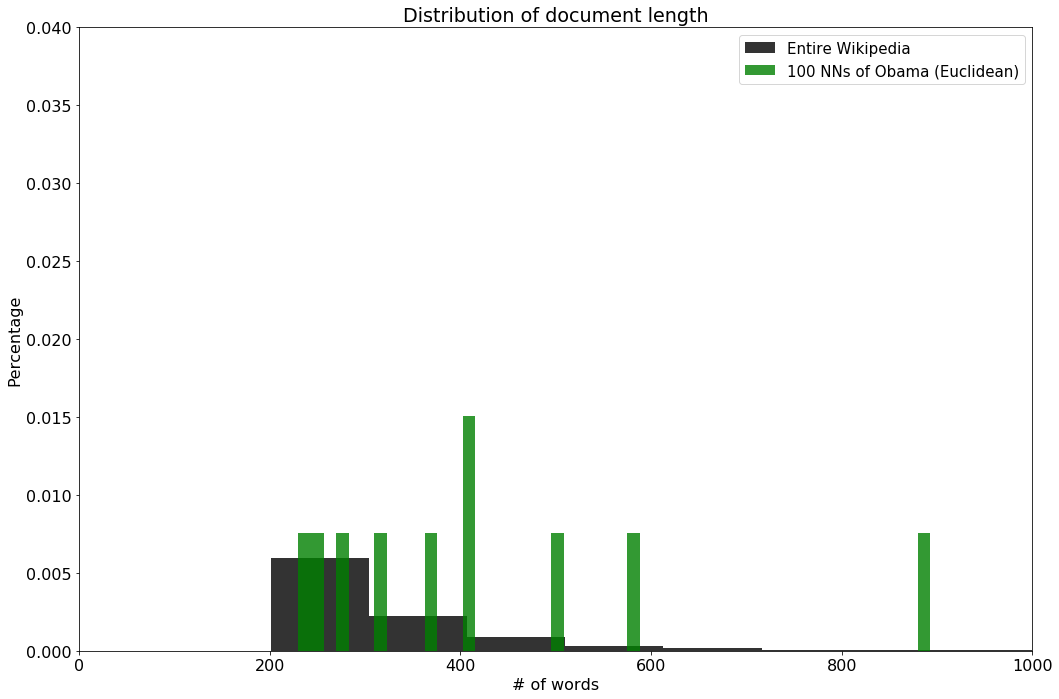

In [96]:
plt.figure(figsize=(15,10))
plt.figure(figsize=(15,10))
plt.hist(articles['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(NN_euclidean['Length'].tolist(), 50, color='g', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
'''plt.hist(NN_cosine['Length'].tolist(), 50, color='b', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (cosine)', zorder=12, alpha=0.8)'''
plt.axis([0, 1000, 0, 0.04])
plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()

hence, we conclude that when using raw word counts as features, they dont penalize most frequently used words. But thats not the case with tfidf scores, but it has a bias towards document length. Cosine distances completely ignores document lengths.